In [2]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_rows', 16)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import gc

In [3]:
import matplotlib.ticker as ticker

In [4]:
plt.rcParams['figure.figsize'] = (16.0, 9.0)

# Information Coefficient Analysis

In [5]:
ret_df = pd.read_pickle('./output_data/factor_exposure/all_exposure.pkl')

In [6]:
ret_df

secID ret_date  tradeDate       ret        rf     exret  \
0       000001.XSHE  2008-03 2008-02-29 -0.149321  0.002746 -0.152068   
1       000001.XSHE  2008-04 2008-03-31  0.050355  0.002862  0.047493   
2       000001.XSHE  2008-05 2008-04-30 -0.148211  0.002953 -0.151164   
3       000001.XSHE  2008-06 2008-05-30 -0.233848  0.003113 -0.236961   
4       000001.XSHE  2008-07 2008-06-30  0.076047  0.002806  0.073241   
5       000001.XSHE  2008-08 2008-07-31 -0.028846  0.002681 -0.031527   
6       000001.XSHE  2008-09 2008-08-29 -0.257922  0.002889 -0.260811   
7       000001.XSHE  2008-10 2008-09-26 -0.271959  0.002509 -0.274468   
...             ...      ...        ...       ...       ...       ...   
652728  689009.XSHG  2024-10 2024-09-30 -0.080923  0.001517 -0.082440   
652729  689009.XSHG  2024-11 2024-10-31  0.004506  0.001477  0.003029   
652730  689009.XSHG  2024-12 2024-11-29  0.067436  0.001401  0.066035   
652731  689009.XSHG  2025-01 2024-12-31  0.080840  0.001422  0.079419   
652732  689009.XSHG  2025-02 2025-01-27  0.113168  0.001557  0.111611   
652733  689009.XSHG  2025-03 2025-02-28  0.140844  0.001607  0.139237   
652734  689009.XSHG  2025-04 2025-03-31 -0.182671  0.001509 -0.184180   
652735  689009.XSHG      NaT 2025-04-07       NaN       NaN       NaN   

             ym        mktcap       size       rev mom_date       mom    beta  \
0       2008-02  5.823860e+10  24.787814 -0.007450  2008-01       NaN  1.0292   
1       2008-03  4.954234e+10  24.626093 -0.152068  2008-02       NaN  1.0238   
2       2008-04  5.203702e+10  24.675221  0.047493  2008-03       NaN  1.0212   
3       2008-05  4.432458e+10  24.514805 -0.151164  2008-04       NaN  1.0697   
4       2008-06  4.140495e+10  24.446666 -0.236961  2008-05       NaN  1.0672   
5       2008-07  4.455369e+10  24.519961  0.073241  2008-06       NaN  1.0966   
6       2008-08  4.326849e+10  24.490690 -0.031527  2008-07       NaN  1.0386   
7       2008-09  3.210865e+10  24.192391 -0.260811  2008-08       NaN  1.1184   
...         ...           ...        ...       ...      ...       ...     ...   
652728  2024-09  2.633272e+10  23.994078  0.076791  2024-08  0.292420  1.0361   
652729  2024-10  2.420206e+10  23.909704 -0.082440  2024-09  0.480329  1.3022   
652730  2024-11  2.431436e+10  23.914333  0.003029  2024-10  0.347795  1.2585   
652731  2024-12  2.610548e+10  23.985411  0.066035  2024-11  0.510890  1.2255   
652732  2025-01  2.822514e+10  24.063479  0.079419  2024-12  1.049486  1.1695   
652733  2025-02  3.141930e+10  24.170688  0.111611  2025-01  0.706337  1.2526   
652734  2025-03  3.584494e+10  24.302468  0.139237  2025-02  0.921636  1.3115   
652735  2025-04  2.929719e+10  24.100757 -0.184180  2025-03  0.764553  1.5641   

              bm     illiq  illiq_12m       vol      ivol  vol_clip  ivol_clip  
0       0.110009  0.000064        NaN  0.041448       NaN  0.041448        NaN  
1       0.201102  0.000043        NaN  0.045109       NaN  0.045109        NaN  
2       0.206701  0.000051        NaN  0.046323       NaN  0.046323        NaN  
3       0.242665  0.000071        NaN  0.036031       NaN  0.036031        NaN  
4       0.304090  0.000084        NaN  0.041642       NaN  0.041642        NaN  
5       0.282598  0.000083        NaN  0.033244       NaN  0.033244        NaN  
6       0.351136  0.000093        NaN  0.028676       NaN  0.028676        NaN  
7       0.473171  0.000175        NaN  0.053642       NaN  0.053642        NaN  
...          ...       ...        ...       ...       ...       ...        ...  
652728  0.162713  0.000041   0.000103  0.037444  0.021285  0.037444   0.021285  
652729  0.190752  0.000056   0.000091  0.057663  0.020563  0.057663   0.020563  
652730  0.189876  0.000047   0.000088  0.028503  0.018614  0.028503   0.018614  
652731  0.177806  0.000028   0.000080  0.019448  0.016439  0.019448   0.016439  
652732  0.164468  0.000045   0.000069  0.027008  0.022593  0.027008   0.022593  
652733  0.147748  0.00003

In [7]:
ic_illiq = ret_df.groupby('ret_date')[['exret','illiq']].corr(method='spearman')
ic_illiq.reset_index(inplace=True)
ic_illiq

ret_date level_1     exret     illiq
0    2008-03   exret  1.000000  0.174687
1    2008-03   illiq  0.174687  1.000000
2    2008-04   exret  1.000000 -0.270851
3    2008-04   illiq -0.270851  1.000000
4    2008-05   exret  1.000000  0.222739
5    2008-05   illiq  0.222739  1.000000
6    2008-06   exret  1.000000  0.008618
7    2008-06   illiq  0.008618  1.000000
..       ...     ...       ...       ...
404  2025-01   exret  1.000000  0.148881
405  2025-01   illiq  0.148881  1.000000
406  2025-02   exret  1.000000  0.105311
407  2025-02   illiq  0.105311  1.000000
408  2025-03   exret  1.000000  0.105237
409  2025-03   illiq  0.105237  1.000000
410  2025-04   exret  1.000000 -0.008662
411  2025-04   illiq -0.008662  1.000000

[412 rows x 4 columns]

In [8]:
ic_illiq = ic_illiq[ic_illiq['level_1'] != 'illiq'].drop(['exret','level_1'],axis=1)

In [9]:
ic_illiq

ret_date     illiq
0    2008-03  0.174687
2    2008-04 -0.270851
4    2008-05  0.222739
6    2008-06  0.008618
8    2008-07  0.327820
10   2008-08  0.156255
12   2008-09 -0.133102
14   2008-10  0.211614
..       ...       ...
396  2024-09 -0.019710
398  2024-10  0.078565
400  2024-11  0.239106
402  2024-12 -0.149578
404  2025-01  0.148881
406  2025-02  0.105311
408  2025-03  0.105237
410  2025-04 -0.008662

[206 rows x 2 columns]

In [10]:
ic_illiq.set_index('ret_date',inplace=True)

In [11]:
# ic_illiq.index = ic_illiq.index.to_timestamp()

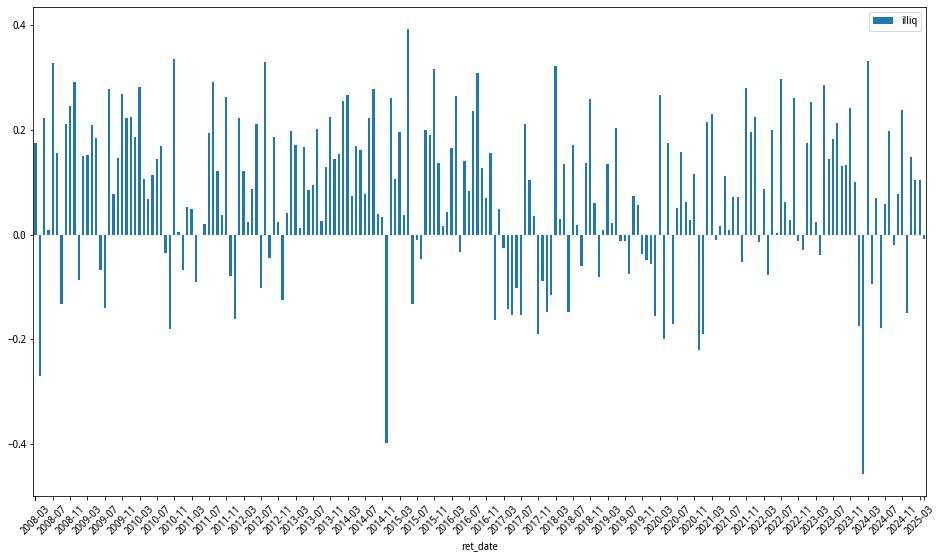

In [12]:
# fig, ax = plt.subplots()
# plt.bar(ic_illiq.index, ic_illiq['illiq'])
# plt.gca().xaxis.set_major_locator(dates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
# # fig.autofmt_xdate()
# plt.show()
ax = ic_illiq.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
# ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
plt.show()

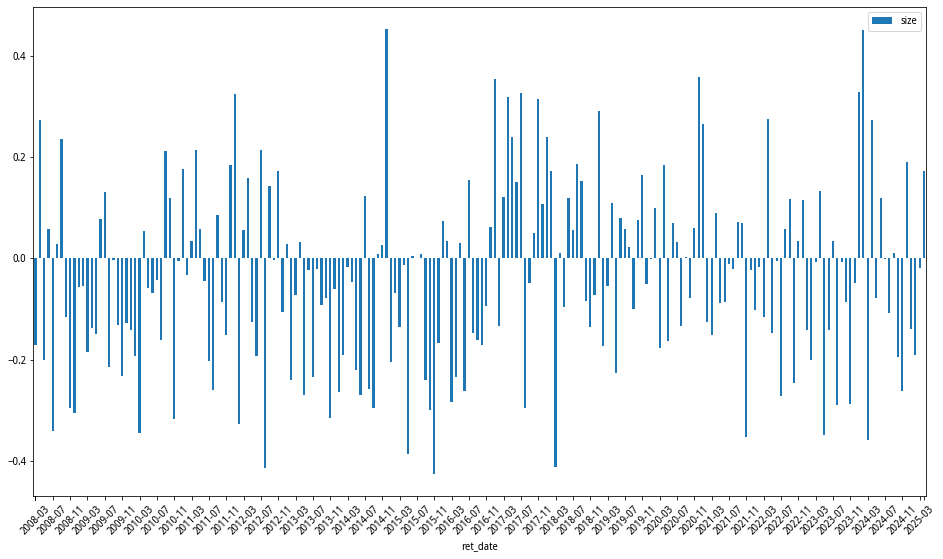

In [13]:
ic_size = ret_df.groupby('ret_date')[['exret','size']].corr(method='spearman')
ic_size.reset_index(inplace=True)
ic_size = ic_size[ic_size['level_1'] != 'size'].drop(['exret','level_1'],axis=1)
ic_size.set_index('ret_date',inplace=True)
ax = ic_size.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

In [14]:
ic_rev = ret_df.groupby('ret_date')[['exret','rev']].corr(method='spearman')
ic_rev.reset_index(inplace=True)
ic_rev = ic_rev[ic_rev['level_1'] != 'rev'].drop(['exret','level_1'],axis=1)
ic_rev.set_index('ret_date',inplace=True)
ax = ic_rev.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

In [15]:
ic_mom = ret_df.groupby('ret_date')[['exret','mom']].corr(method='spearman')
ic_mom.reset_index(inplace=True)
ic_mom = ic_mom[ic_mom['level_1'] != 'mom'].drop(['exret','level_1'],axis=1)
ic_mom.set_index('ret_date',inplace=True)
ax = ic_mom.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

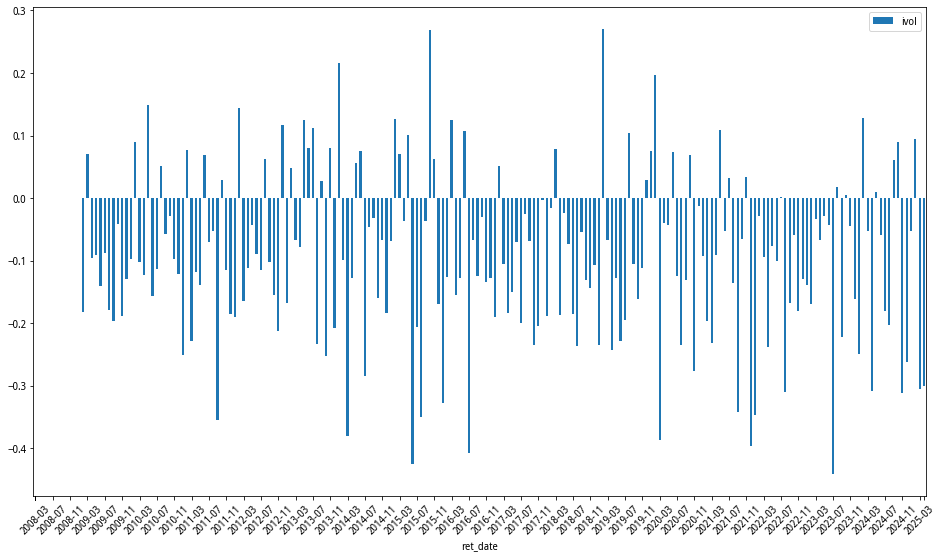

In [16]:
ic_ivol = ret_df.groupby('ret_date')[['exret','ivol']].corr(method='spearman')
ic_ivol.reset_index(inplace=True)
ic_ivol = ic_ivol[ic_ivol['level_1'] != 'ivol'].drop(['exret','level_1'],axis=1)
ic_ivol.set_index('ret_date',inplace=True)
ax = ic_ivol.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

In [17]:
cols = ['beta','size','bm','mom','rev','illiq','ivol']
ic_df = pd.DataFrame()
for col in cols:
    temp = ret_df.groupby('ret_date')[['exret',col]].corr(method='spearman')
    temp.reset_index(inplace=True)
    ic_df[col] = temp[temp['level_1'] != col].drop(['exret','level_1','ret_date'],axis=1)[col].values

In [18]:
ic_df.index = np.sort(ret_df['ret_date'].unique().dropna())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa024d27f50>,
      dtype=object)

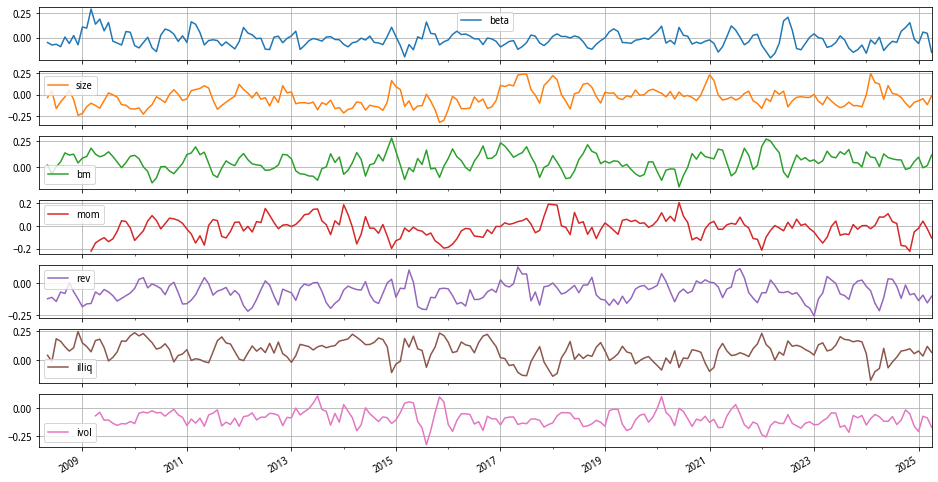

In [19]:
ic_df[cols].rolling(3).mean().plot(subplots=True,grid=True)

information ratio = IC.mean()/IC.std()

In [20]:
# Information ratio
ic_df.apply(lambda x: x.mean()/x.std())

beta    -0.108879
size    -0.214666
bm       0.340334
mom     -0.112139
rev     -0.480242
illiq    0.526850
ivol    -0.701399
dtype: float64

# Fund performance

## Fund return data

In [21]:
START = '2008-01-01'
END = '2025-03-31'
# Security Id
fund_info = DataAPI.SecIDGet(assetClass="F",pandas="1")

In [22]:
fund_info

secID  ticker                                       secShortName  \
0      000001.OFCN  000001                                               华夏成长   
1      000003.OFCN  000003                                          中海可转债债券-A   
2      000004.OFCN  000004                                          中海可转债债券-C   
3      000005.OFCN  000005                                         嘉实增强信用定开债券   
4      000006.OFCN  000006                                       西部利得量化成长混合-A   
5      000007.OFCN  000007                                          鹏华国有企业债债券   
6      000008.OFCN  000008                                     嘉实中证500ETF联接-A   
7      000009.OFCN  000009                                        易方达天天理财货币-A   
...            ...     ...                                                ...   
31238    BSJR.XNAS    BSJR  Invesco BulletShares 2027 High Yield Corporate...   
31239    BSJS.XNAS    BSJS  Invesco BulletShares 2028 High Yield Corporate...   
31240    GHYB.XNYS    GHYB                                               GHYB   
31241    HYXF.XNAS    HYXF                                               HYXF   
31242    JMHI.XPHS    JMHI                  JPMorgan High Yield Municipal ETF   
31243    SCYB.XPHS    SCYB                         Schwab High Yield Bond ETF   
31244    SYFI.XNYS    SYFI                   AB Short Duration High Yield ETF   
31245     YLD.XNYS     YLD                    Principal Active High Yield ETF   

                    cnSpell exchangeCD assetClass listStatusCD    listDate  \
0                      HXCZ        NaN          F           UN         NaN   
1                 ZHKZZZQ-A        NaN          F           UN         NaN   
2                 ZHKZZZQ-C        NaN          F           UN         NaN   
3                JSZQXYDKZQ        NaN          F           UN         NaN   
4              XBLDLHCZHH-A        NaN          F           UN         NaN   
5                 PHGYQYZZQ        NaN          F           UN         NaN   
6            JSZZ500ETFLJ-A        NaN          F           UN         NaN   
7               YFDTTLCHB-A        NaN          F           UN         NaN   
...                     ...        ...        ...          ...         ...   
31238  Invesco BulletSha...       XNAS          F            L  2019-09-12   
31239  Invesco BulletSha...       XNAS          F            L  2020-09-16   
31240                  GHYB       XNYS          F            L  2017-09-05   
31241                  HYXF       XNAS          F            L  2016-06-14   
31242  JPMorgan High Yie...       XPHS          F            L  2023-07-17   
31243  Schwab High Yield...       XPHS          F            L  2023-07-11   
31244  AB Short Duration...       XNYS          F            L  2024-06-10   
31245  Principal Active ...       XNYS          F            L  2015-07-08   

      transCurrCD ISIN     partyID delistDate  
0             CNY  NaN     26812.0        NaN  
1             CNY  NaN     16550.0        NaN  
2             CNY  NaN     16550.0        NaN  
3             CNY  NaN     26817.0        NaN  
4             CNY  NaN     40283.0        NaN  
5             CNY  NaN     26816.0        NaN  
6             CNY  NaN     26817.0        NaN  
7             CNY  NaN     26932.0        NaN  
...           ...  ...         ...        ...  
31238         USD  NaN  60021149.0        NaN  
31239         USD  NaN  60021149.0        NaN  
31240         USD  NaN         NaN        NaN  
31241         USD  NaN         NaN        NaN  
31242         NaN  NaN         NaN        NaN  
31243         NaN  NaN         NaN        NaN  
31244         USD  NaN  60021152.0        NaN  
31245         USD  NaN  60021153.0        NaN  

[31246 rows x 12 columns]

In [23]:
# fund_id = ['110022','009550','001938','009341',
#            '000751','004997','009863','001714',
#            '001410','004851','005827','110011',
#            '260108','163402','320007','163417',
#            '001511','161728','161005','161131']
# fund_id =["519212","519191","519185","001678",
#           "004685","001437","519198","002049",
#           "010761","000398","011891","001470",
#           "166301","008488","006195","002601",
#           "001959","011403","013142","001763"]
# fund_id = [id_+'.OFCN' for id_ in fund_id]
# fund_id = ['014283', '001614', '016325', '001323', '001322', '001167', '210009', '014273', '290012', '016307', '014277', '210002', '162102', '004890', '620007', '014279', '217021', '010383', '005310', '004685']
fund_id = [
    "017102",
    "017490",
    "009707",
    "015641",
    "006718",
    "001480",
    "014915",
    "009062",
    "001412",
    "501046"
]

In [24]:
len(fund_id)

10

In [25]:
fund_name = fund_info.loc[fund_info['ticker'].isin(fund_id),['ticker','secShortName']]
fund_name

ticker     secShortName
1367   001412   德邦鑫星价值灵活配置混合-A
1428   001480       财通成长优选混合-A
6803   006718     国融融盛龙头严选混合-A
9097   009062       财通智慧成长混合-A
9738   009707     工银瑞信新兴制造混合-A
14874  014915  财通匠心优选一年持有期混合-A
15588  015641       银华数字经济股票-A
17013  017102       大摩数字经济混合-A
17397  017490  财通景气甄选一年持有期混合-A
27896  501046  财通多策略福鑫定开灵活配置混合
27897  501046  财通多策略福鑫定开灵活配置混合

In [26]:
print(fund_name.to_string())

       ticker     secShortName
1367   001412   德邦鑫星价值灵活配置混合-A
1428   001480       财通成长优选混合-A
6803   006718     国融融盛龙头严选混合-A
9097   009062       财通智慧成长混合-A
9738   009707     工银瑞信新兴制造混合-A
14874  014915  财通匠心优选一年持有期混合-A
15588  015641       银华数字经济股票-A
17013  017102       大摩数字经济混合-A
17397  017490  财通景气甄选一年持有期混合-A
27896  501046  财通多策略福鑫定开灵活配置混合
27897  501046  财通多策略福鑫定开灵活配置混合


In [27]:
# fund_name.loc[~fund_name['secShortName'].str.contains('债')]

In [61]:
# fund_name = fund_name.loc[~fund_name['secShortName'].str.contains('债')].copy()

In [28]:
fund_name.loc[fund_name.duplicated('ticker',keep=False)] # keep='last'

ticker     secShortName
27896  501046  财通多策略福鑫定开灵活配置混合
27897  501046  财通多策略福鑫定开灵活配置混合

In [29]:
fund_name = fund_name.drop_duplicates('ticker',keep='last')
fund_name

ticker     secShortName
1367   001412   德邦鑫星价值灵活配置混合-A
1428   001480       财通成长优选混合-A
6803   006718     国融融盛龙头严选混合-A
9097   009062       财通智慧成长混合-A
9738   009707     工银瑞信新兴制造混合-A
14874  014915  财通匠心优选一年持有期混合-A
15588  015641       银华数字经济股票-A
17013  017102       大摩数字经济混合-A
17397  017490  财通景气甄选一年持有期混合-A
27897  501046  财通多策略福鑫定开灵活配置混合

In [30]:
# Fund_NAV_Month.csv 从 CSMAR 下载
# 基金市场系列 -> 公募基金 -> 基金表现 -> 基金月净值文件
fund_df = pd.read_csv('./data/Fund_NAV_Month2025.csv',dtype={'Symbol':str})
fund_df

TradingDate TradingMonth  Symbol     NAV  ReturnNAV
0       2001-12-28      2001-12  000001  1.0000     0.0000
1       2002-01-31      2002-01  000001  1.0020     0.0020
2       2002-02-28      2002-02  000001  1.0130     0.0110
3       2002-03-31      2002-03  000001  1.0230     0.0099
4       2002-04-30      2002-04  000001  1.0460     0.0225
5       2002-05-31      2002-05  000001  1.0270    -0.0182
6       2002-06-30      2002-06  000001  1.0730     0.0448
7       2002-07-31      2002-07  000001  1.0450    -0.0261
...            ...          ...     ...     ...        ...
999992  2024-05-31      2024-05  017950  0.7518    -0.0347
999993  2024-06-30      2024-06  017950  0.7091    -0.0568
999994  2024-07-31      2024-07  017950  0.7155     0.0090
999995  2024-08-30      2024-08  017950  0.6762    -0.0549
999996  2024-09-30      2024-09  017950  0.9010     0.3324
999997  2024-10-31      2024-10  017950  0.8797    -0.0236
999998  2024-11-29      2024-11  017950  0.9086     0.0329
999999  2024-12-31      2024-12  017950  0.8782    -0.0335

[1000000 rows x 5 columns]

In [31]:
top_fund_df = fund_df[fund_df['Symbol'].isin(fund_id)].copy()

In [32]:
top_fund_df['Symbol'].nunique()

9

In [38]:
list(set(fund_id) - set(top_fund_df['Symbol'].unique()))

['501046']

In [39]:
top_fund_df.rename(columns={'Symbol':'ticker','TradingMonth':'ret_date','ReturnNAV':'ret'},inplace=True)

In [40]:
top_fund_df = pd.merge(top_fund_df, fund_name, on='ticker')

In [41]:
top_fund_df = top_fund_df[['ret_date','ticker','secShortName','ret']].copy()

In [42]:
top_fund_df['ret_date'] = pd.to_datetime(top_fund_df['ret_date']).dt.to_period('M')

In [43]:
top_fund_df

ret_date  ticker     secShortName     ret
0    2015-06  001412   德邦鑫星价值灵活配置混合-A  0.0000
1    2015-07  001412   德邦鑫星价值灵活配置混合-A -0.0161
2    2015-08  001412   德邦鑫星价值灵活配置混合-A -0.0094
3    2015-09  001412   德邦鑫星价值灵活配置混合-A -0.0079
4    2015-10  001412   德邦鑫星价值灵活配置混合-A  0.0216
5    2015-11  001412   德邦鑫星价值灵活配置混合-A  0.0039
6    2015-12  001412   德邦鑫星价值灵活配置混合-A  0.0047
7    2016-01  001412   德邦鑫星价值灵活配置混合-A -0.0013
..       ...     ...              ...     ...
532  2024-08  017490  财通景气甄选一年持有期混合-A -0.0981
533  2024-09  017490  财通景气甄选一年持有期混合-A  0.2078
534  2024-10  017490  财通景气甄选一年持有期混合-A  0.1746
535  2024-11  017490  财通景气甄选一年持有期混合-A -0.0026
536  2024-12  017490  财通景气甄选一年持有期混合-A  0.0974
537  2025-01  017490  财通景气甄选一年持有期混合-A  0.0381
538  2025-02  017490  财通景气甄选一年持有期混合-A -0.1394
539  2025-03  017490  财通景气甄选一年持有期混合-A -0.1339

[540 rows x 4 columns]

## Factor return data

In [44]:
# factor_ret = pd.read_pickle('./output_data/factors/factors_all.pkl')
factor_ret = pd.read_pickle('./output_data/factors/factors_all_long_only.pkl')

In [45]:
factor_ret

rf  exmktret  small_only  high_only  rev_long  illiq_long  \
ret_date                                                                    
2008-02   0.002946  0.024010    0.103117   0.059319  0.061681    0.054128   
2008-03   0.002746 -0.195480   -0.180562  -0.202495 -0.166628   -0.180816   
2008-04   0.002862  0.022519   -0.073326  -0.010688  0.023537   -0.063553   
2008-05   0.002953 -0.080798   -0.020022  -0.056407 -0.041286   -0.061992   
2008-06   0.003113 -0.236014   -0.257252  -0.239010 -0.249574   -0.218804   
2008-07   0.002806  0.014972    0.108774   0.072304  0.086499    0.084925   
2008-08   0.002681 -0.170063   -0.232768  -0.187431 -0.203066   -0.206455   
2008-09   0.002889 -0.067913   -0.089285  -0.068049 -0.063174   -0.065761   
...            ...       ...         ...        ...       ...         ...   
2023-08   0.001594 -0.062576   -0.033271  -0.046533 -0.037027   -0.037344   
2023-09   0.001904 -0.018904    0.000098  -0.000625 -0.007526    0.009877   
2023-10   0.001890 -0.032835   -0.003186  -0.025060 -0.029482   -0.008774   
2023-11   0.001914 -0.017006    0.048927   0.010436  0.025713    0.041718   
2023-12   0.002068 -0.021342   -0.015419  -0.019122 -0.017794   -0.020613   
2024-01   0.001902 -0.084298   -0.210021  -0.084317 -0.185138   -0.182079   
2024-02   0.001749  0.102804    0.025233   0.035357  0.120001    0.022659   
2024-03   0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   

          ivol_long  
ret_date             
2008-02    0.060423  
2008-03   -0.152310  
2008-04   -0.024827  
2008-05   -0.054124  
2008-06   -0.224208  
2008-07    0.067996  
2008-08   -0.165454  
2008-09   -0.080529  
...             ...  
2023-08   -0.043041  
2023-09    0.004817  
2023-10   -0.016420  
2023-11    0.022232  
2023-12   -0.009437  
2024-01   -0.109111  
2024-02    0.037134  
2024-03    0.040866  

[194 rows x 7 columns]

In [46]:
reg_df = pd.merge(factor_ret.reset_index(), top_fund_df, on='ret_date')

In [47]:
reg_df['exret'] = reg_df['ret']-reg_df['rf']

In [48]:
reg_df

ret_date        rf  exmktret  small_only  high_only  rev_long  illiq_long  \
0    2015-06  0.002934 -0.087417   -0.088312  -0.022743  0.014316   -0.158606   
1    2015-06  0.002934 -0.087417   -0.088312  -0.022743  0.014316   -0.158606   
2    2015-07  0.002490 -0.145123   -0.165969  -0.128866 -0.147676   -0.164422   
3    2015-07  0.002490 -0.145123   -0.165969  -0.128866 -0.147676   -0.164422   
4    2015-08  0.002528 -0.129587   -0.123809  -0.124842 -0.112959   -0.155115   
5    2015-08  0.002528 -0.129587   -0.123809  -0.124842 -0.112959   -0.155115   
6    2015-09  0.002576 -0.057292   -0.019951  -0.031071 -0.012158   -0.040430   
7    2015-09  0.002576 -0.057292   -0.019951  -0.031071 -0.012158   -0.040430   
..       ...       ...       ...         ...        ...       ...         ...   
424  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   
425  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   
426  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   
427  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   
428  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   
429  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   
430  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   
431  2024-03  0.001783 -0.000526    0.069588   0.028328  0.052248    0.045175   

     ivol_long  ticker     secShortName     ret     exret  
0     0.008116  001412   德邦鑫星价值灵活配置混合-A  0.0000 -0.002934  
1     0.008116  001480       财通成长优选混合-A  0.0000 -0.002934  
2    -0.111453  001412   德邦鑫星价值灵活配置混合-A -0.0161 -0.018590  
3    -0.111453  001480       财通成长优选混合-A -0.0560 -0.058490  
4    -0.090667  001412   德邦鑫星价值灵活配置混合-A -0.0094 -0.011928  
5    -0.090667  001480       财通成长优选混合-A -0.0053 -0.007828  
6    -0.035732  001412   德邦鑫星价值灵活配置混合-A -0.0079 -0.010476  
7    -0.035732  001480       财通成长优选混合-A  0.0000 -0.002576  
..         ...     ...              ...     ...       ...  
424   0.040866  001480       财通成长优选混合-A  0.0506  0.048817  
425   0.040866  006718     国融融盛龙头严选混合-A  0.0515  0.049717  
426   0.040866  009062       财通智慧成长混合-A  0.0513  0.049517  
427   0.040866  009707     工银瑞信新兴制造混合-A  0.0325  0.030717  
428   0.040866  014915  财通匠心优选一年持有期混合-A  0.0528  0.051017  
429   0.040866  015641       银华数字经济股票-A  0.0089  0.007117  
430   0.040866  017102       大摩数字经济混合-A  0.0911  0.089317  
431   0.040866  017490  财通景气甄选一年持有期混合-A  0.0506  0.048817  

[432 rows x 12 columns]

In [49]:
# results = {}
# for fund in fund_id:
#     df_ = reg_df[reg_df['ticker'] == fund].copy()
#     X = df_[['exmktret','SMB','HML','rev','illiq','ivol']]
#     y = df_['exret']
#     X = sm.add_constant(X)
#     reg = sm.OLS(y, X).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
#     results[fund] = pd.DataFrame([reg.params,reg.tvalues],columns=['alpha','exmktret','SMB','HML','rev','illiq','ivol'],
#                                   index=['coefs','tvalues'])
results = {}
for fund in fund_id:
    df_ = reg_df[reg_df['ticker'] == fund].copy()
    if df_.shape[0] == 0:
        continue
    else:
        X = df_[['exmktret','small_only','high_only','rev_long','illiq_long','ivol_long']]
        y = df_['exret']
        X = sm.add_constant(X)
        reg = sm.OLS(y, X).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
        results[fund] = pd.DataFrame([reg.params,reg.tvalues],columns=['alpha','exmktret','small_only','high_only','rev_long','illiq_long','ivol_long'],
                                      index=['coefs','tvalues'])

In [50]:
fund_id = list(set(fund_id).intersection(reg_df['ticker'].unique()))

In [51]:
for fund in fund_id:
    print(fund_name.loc[fund_name['ticker']==fund,'secShortName'].values)
    display(results[fund])
# print('#################'*5)
# for fund in fund_id[10:20]:
#     print(fund_name.loc[fund_name['ticker']==fund,'secShortName'].values)
#     display(results[fund])

['国融融盛龙头严选混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.015912  0.755236    0.128618   0.094243  1.140917   -0.485346   
tvalues  1.455149  2.375708    0.185488   0.150492  1.726115   -0.575876   

         ivol_long  
coefs    -0.980754  
tvalues  -1.171385

['财通智慧成长混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.023842  1.328157    1.543221   1.618244 -0.045358    -0.50511   
tvalues  1.738610  2.862524    3.208595   1.796187 -0.055729    -0.76656   

         ivol_long  
coefs    -3.228116  
tvalues  -2.457830

['财通匠心优选一年持有期混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.013990  1.284234    0.894722   0.090281  1.408989   -0.544921   
tvalues  1.120841  2.428795    2.249403   0.286194  2.910163   -0.662700   

         ivol_long  
coefs    -2.857883  
tvalues  -3.510366

['财通成长优选混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.024743  1.285155    1.979694   0.925136  0.038407   -1.737361   
tvalues  3.368678  5.687882    5.306529   1.512256  0.085269   -5.065551   

         ivol_long  
coefs    -1.827555  
tvalues  -3.569027

['德邦鑫星价值灵活配置混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.001058  0.488794   -0.070354  -0.801978  0.508020   -0.132994   
tvalues  0.284914  3.162437   -0.286866  -2.157507  1.135888   -0.666341   

         ivol_long  
coefs     0.300696  
tvalues   0.743794

['工银瑞信新兴制造混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.00781  1.332088   -0.052398  -0.750786 -0.460723    1.411845   
tvalues  1.15753  5.508407   -0.142707  -1.676260 -1.868006    2.616606   

         ivol_long  
coefs    -0.857073  
tvalues  -1.351218

['银华数字经济股票-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.017924  2.228530    0.122166  -0.353370  0.294745    1.920910   
tvalues  2.819040  5.913491    0.223712  -1.343212  0.895400    3.011751   

         ivol_long  
coefs    -3.399711  
tvalues  -4.586834

['财通景气甄选一年持有期混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.032937 -0.016591    0.577368   3.990942  1.840284   -1.019571   
tvalues  2.123518 -0.019272    0.731051   1.795388  2.794995   -0.947654   

         ivol_long  
coefs    -3.846803  
tvalues  -1.910107

['大摩数字经济混合-A']


alpha  exmktret  small_only  high_only  rev_long  illiq_long  \
coefs    0.020179  0.208292    2.132127   2.582155  2.945992   -4.018465   
tvalues  1.858538  0.189879    2.829215   3.168045  3.337112   -5.748884   

         ivol_long  
coefs    -2.569681  
tvalues  -3.614666